<a href="https://colab.research.google.com/github/fagonzalezo/qmc/blob/master/examples/qmkdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install qmc if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

In [2]:
%matplotlib inline
import numpy as np
import pylab as pl

# Function to visualize a 2D dataset
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Function to visualize the decission surface of a classifier
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 50)
    y_vals = np.linspace(min_y, max_y, 50)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    vals = [[XX[i, j], YY[i, j]] for i in range(grid_r) for j in range(grid_c)]
    preds = pred_fun(np.array(vals))
    ZZ = np.reshape(preds, (grid_r, grid_c))
    print(np.min(preds), np.min(ZZ))
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    CS = pl.contour(XX, YY, ZZ, 100, levels = [0.1*i for i in range(1,10)])
    pl.clabel(CS, inline=1, fontsize=10)
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(X):
        return clf.predict(X)[:, 1]
    return pred_fun

### Two moons example

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import qmc.tf.layers as layers
import qmc.tf.models as models


In [4]:
X, y = make_moons(n_samples=2000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

42/42 [==============================] - 0s 3ms/step
[[0.12925543 0.8707445 ]
 [0.7048589  0.29514113]
 [0.10257529 0.8974247 ]
 [0.13454382 0.86545616]
 [0.4245418  0.5754582 ]
 [0.9231669  0.07683314]
 [0.403873   0.59612703]
 [0.13573888 0.86426115]
 [0.85210115 0.14789884]
 [0.16332537 0.83667463]]
0.9348484848484848
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.018782988 0.018782988


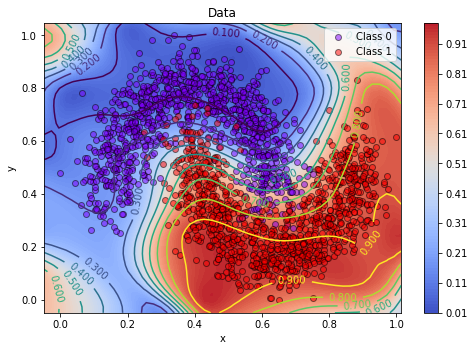

In [5]:
fm_x = layers.QFeatureMapRFF(2, dim=150, gamma=20, random_state=17)
qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=150, num_classes=2)
qmkdc.compile()
qmkdc.fit(X_train, y_train, epochs=1)
out = qmkdc.predict(X_test)
print(out[:10])
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmkdc))
plot_data(X, y)

0.9363636363636364
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.008485436 0.008485436


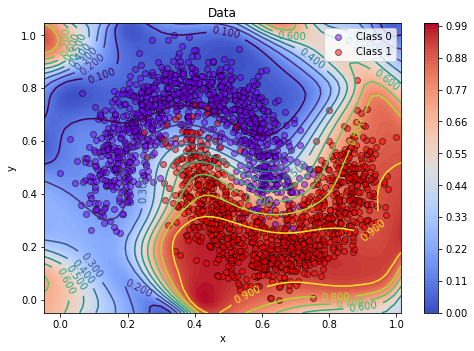

In [6]:
qmkdc1 = models.QMKDClassifierSGD(input_dim=2, dim_x=150, num_classes=2, num_eig=5, gamma=20, random_state=17)
qmkdc1.set_rhos(qmkdc.get_rhos())
out = qmkdc1.predict(X_test)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmkdc1))
plot_data(X, y)


42/42 [==============================] - 1s 27ms/step - loss: 0.1081
0.9363636363636364
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.00042108787 0.00042108787


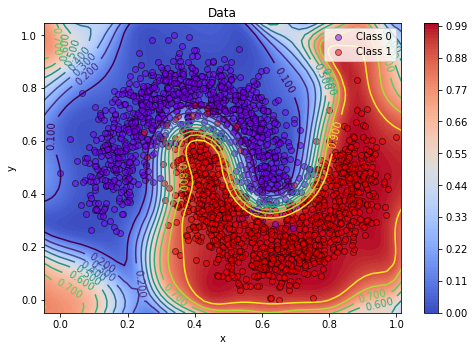

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
qmkdc1.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
qmkdc1.set_rhos(qmkdc.get_rhos())
y_train_bin = tf.reshape (tf.keras.backend.one_hot(y_train, 2), (-1,2))
qmkdc1.fit(X_train, y_train_bin, epochs=1)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmkdc1))
plot_data(X, y)


42/42 [==============================] - 1s 31ms/step - loss: 0.1444
0.9363636363636364
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
0.00041182962 0.00041182962


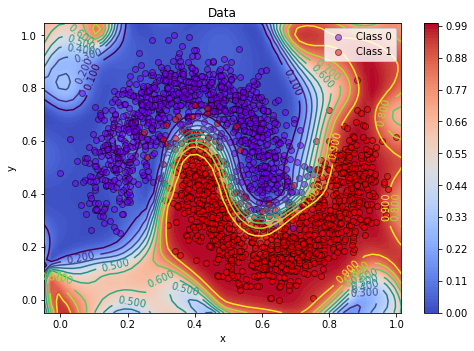

In [8]:
qmkdc1 = models.QMKDClassifierSGD(input_dim=2, dim_x=150, num_classes=2, num_eig=5, gamma=20, random_state=17)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
qmkdc1.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
y_train_bin = tf.reshape (tf.keras.backend.one_hot(y_train, 2), (-1,2))
qmkdc1.fit(X_train, y_train_bin, epochs=1)
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmkdc1))
plot_data(X, y)